# Video: Building a Simple Portfolio Risk Model

In this video, you will see a simple portfolio risk model be built from scratch using easily accessible online data.


Script:
* I am going to show you how to build a simple portfolio risk model in Python.
* The math is not hard, just means and covariances, but this is the foundation upon which quantitative risk management was developed.


In [ ]:
# adjusted closing price data from
# https://finance.yahoo.com/quote/AAPL/history/
# https://finance.yahoo.com/quote/SPY/history/
# https://finance.yahoo.com/quote/TSLA/history/

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

historical_prices_url = "https://raw.githubusercontent.com/bu-cds-omds/dx704-examples/refs/heads/main/data/prices-monthly.tsv"
historical_prices = pd.read_csv(historical_prices_url, sep="\t")
historical_prices = historical_prices.set_index("date")
historical_prices

,AAPL,SPY,TSLA
date,,,
2024-05-31,191.36,527.37,178.08
2024-06-28,209.64,544.22,197.88
2024-07-31,221.05,550.81,232.07
2024-08-31,228.20,563.68,214.11
2024-09-30,232.18,573.76,261.63
2024-10-31,225.12,568.64,249.85
2024-11-29,236.76,602.55,345.16
2024-12-31,249.82,586.08,403.84
2025-01-31,235.43,601.82,404.60


Script:
* Here, I loaded a small data set that I collected manually from Yahoo Finance.
* The three stock tickers here are for Apple, Standard and Poor's S&P index fund, and Tesla.
* I picked these three to get a mix of asset return and risk, and even if you are not familiar with these stocks, it should soon be pretty clear which one is which.
* The specific numbers collected are the adjusted closing prices for each stock on the last trading day of the month.
* Generally you should use the adjusted prices since they will take into accound dividends and splits and any other factors that would make the prices incomparable over time.
* Let's take a look at how these prices have changed over time.

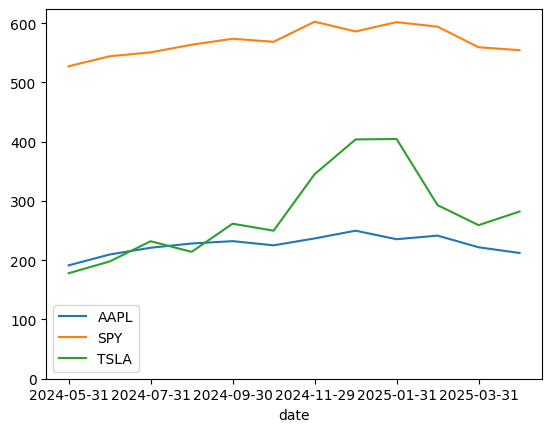

In [ ]:
historical_prices.plot()
plt.ylim(0)
plt.show()

Script:
* Both Apple and the S&P 500 showed some slow growth over this period, but dropped more recently.
* In comparsion, Tesla showed a big jump up at the end of 2024 and then a similarly big drop in early 2025, so it is up a lot more, but also has been a lot more volatile.
* Let's look at the monthly returns for these assets now.
* Pandas dataframes have a handy `.pct_change` method which calculates the return using the previous row for the previous prices.

In [ ]:
historical_returns = historical_prices.pct_change().dropna()
historical_returns

,AAPL,SPY,TSLA
date,,,
2024-06-28,0.095527,0.031951,0.111186
2024-07-31,0.054427,0.012109,0.172781
2024-08-31,0.032346,0.023366,-0.077390
2024-09-30,0.017441,0.017882,0.221942
2024-10-31,-0.030407,-0.008924,-0.045025
2024-11-29,0.051706,0.059634,0.381469
2024-12-31,0.055161,-0.027334,0.170008
2025-01-31,-0.057601,0.026856,0.001882
2025-02-28,0.025868,-0.012695,-0.275877


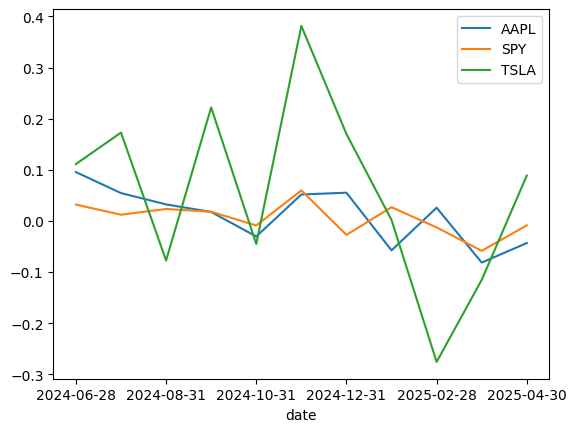

In [ ]:
historical_returns.plot();

Script:
* Look at how much more Tesla returns vary compared to the other two stocks.
* Your opinion about Tesla stock growth will vary a lot depending on which window of time you are looking at.
* If you bought Tesla in January, then you would have been pretty unhappy when the price dropped almost 30% in February.
* That volatile behavior is why we measure the variance or standard deviation of an asset or portfolio to gauge its risk.
* But before we look at risk, let's estimate monthly returns based on this data.

In [ ]:
estimated_returns = historical_returns.mean()
estimated_returns

,0
AAPL,0.010874
SPY,0.005057
TSLA,0.057663


Script:
* The S&P fund has the lowest returns at about half a percent per month, then Apple at about a percent per month, and then Tesla at six percent per month.
* I am calling these estimated returns even though they are the exact average returns from the data set because we are using these numbers as predictions of future return.
* We are estimating that future returns will be similar to the recent past average returns.
* We can estimate future risk similarly using the standard deviation or variance.

In [ ]:
estimated_stddev = historical_returns.std()
estimated_stddev

,0
AAPL,0.055933
SPY,0.032436
TSLA,0.182935


Script:
* The standard deviations have the same order as the returns which is fairly common.
* If we want to estimate the risk of portfolio combining different assets, we will also need to look at the correlations between their returns.
* Do they move in lock step, independently, or opposite each other?

In [ ]:
estimated_correlations = historical_returns.corr()
estimated_correlations

,AAPL,SPY,TSLA
AAPL,1.000000,0.512205,0.422974
SPY,0.512205,1.000000,0.550141
TSLA,0.422974,0.550141,1.000000


Script:
* Note the lowest correlation there is about 42%.
* The S&P 500 index includes both Apple and Tesla with fairly high weights, so it's not surprising to see strong correlations there, but this will limit how much we can reduce portfolio risk.
* We will actually do more calculations using covariances, so let's calculate those too.

In [ ]:
estimated_covariances = historical_returns.cov()
estimated_covariances

,AAPL,SPY,TSLA
AAPL,0.003129,0.000929,0.004328
SPY,0.000929,0.001052,0.003264
TSLA,0.004328,0.003264,0.033465


Script:
* The estimated returns and covariances together form our risk return model.
* Let's try out on an equal weight portfolio with one third allocated to each of these three assets.
* Historically, equal weight portfolios were used as a strawman for easy diversification, and pointing out that a method performed worse than equal weighting might be considered a polite diss.
* I will start with the estimated return.

In [ ]:
w = np.array([1/3, 1/3, 1/3])

estimated_return_P = w @ estimated_returns
estimated_return_P

np.float64(0.024531222378842015)

Script:
* How does that compare to the individual assets?

In [ ]:
historical_returns.mean()

,0
AAPL,0.010874
SPY,0.005057
TSLA,0.057663


Script:
* The equal weight portfolio return is right in the middle of individual asset returns.
* That is to be expected as it is an average of them.
* How risky is this portfolio?

In [ ]:
variance_P = w.T @ estimated_covariances @ w
variance_P

np.float64(0.006076517019179311)

Script:
* That's the calculation assuming that the assets have a multivariate normal distribution.
* So, how does that compare to the individual asset variances?

In [ ]:
historical_returns.var()

,0
AAPL,0.003129
SPY,0.001052
TSLA,0.033465


Script:
* The equal weight portfolio has more risk than Apple and the S&P 500, but a less than Tesla.
* Both the expected return and expected variance lie within the middle of the ranges of the individual assets which is pretty typical.

Script:
* I just showed you how to build a simple risk return model from historical price data.
* Next, we will explore using that model to identify the best portfolio choices soon.

https://github.com/bu-cds-omds/dx704-examples/blob/main/week01/video_building_a_simple_portfolio_risk_model.ipynb